In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../main_data/locale_specific_data/"


### I. Explore Bloomington Data

In [2]:
bloom = pd.read_csv(data_path + 'BloomingtonData.csv')

In [3]:
bloom.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,02/29/2020 12:00:00 AM,Reclaimed,False,11/06/2023 12:00:00 AM,Stray,NaN,Died in care,False,False,False
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,12/17/2023 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False


In [4]:
bloom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34130 entries, 0 to 34129
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                34130 non-null  int64 
 1   intakedate        34130 non-null  object
 2   intakereason      34128 non-null  object
 3   istransfer        34130 non-null  bool  
 4   sheltercode       34130 non-null  object
 5   identichipnumber  29986 non-null  object
 6   animalname        34130 non-null  object
 7   breedname         34058 non-null  object
 8   basecolour        34130 non-null  object
 9   speciesname       34130 non-null  object
 10  animalage         34130 non-null  object
 11  sexname           34130 non-null  object
 12  location          34130 non-null  object
 13  movementdate      28506 non-null  object
 14  movementtype      28506 non-null  object
 15  istrial           34130 non-null  bool  
 16  returndate        10490 non-null  object
 17  returnedreas

In [5]:
bloom_df = bloom.copy()[bloom.speciesname=="Dog"].drop_duplicates()

bloom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11100 entries, 1 to 34128
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11100 non-null  int64 
 1   intakedate        11100 non-null  object
 2   intakereason      11100 non-null  object
 3   istransfer        11100 non-null  bool  
 4   sheltercode       11100 non-null  object
 5   identichipnumber  9768 non-null   object
 6   animalname        11100 non-null  object
 7   breedname         11099 non-null  object
 8   basecolour        11100 non-null  object
 9   speciesname       11100 non-null  object
 10  animalage         11100 non-null  object
 11  sexname           11100 non-null  object
 12  location          11100 non-null  object
 13  movementdate      10088 non-null  object
 14  movementtype      10088 non-null  object
 15  istrial           11100 non-null  bool  
 16  returndate        3612 non-null   object
 17  returnedreason   

In [6]:
bloom_df[~bloom_df.movementtype.isnull()].deceasedreason.value_counts()

deceasedreason
Court Order/ Legal                       9517
Died in care                              277
UU-untreatable, unmanageable Behavior      89
UU - untreatable, unmanageable health      58
Owner Requested                            51
Dead On Arrival                            37
TM - Treatable Manageable Behavior         19
Biting                                     16
Temperament/Behavior                       11
Vet advised euthanasia                      4
TR-Treatable rehabilitable Behavior         3
Medical                                     2
Died in community                           2
Healthy                                     1
TM-Treatable Manageable Health              1
Name: count, dtype: int64

In [7]:
bloom_df[~bloom_df.movementtype.isnull()].movementtype.value_counts()

movementtype
Adoption     5363
Reclaimed    2814
Foster       1764
Transfer      140
Escaped         5
Stolen          2
Name: count, dtype: int64

In [8]:
bloom_df[(~bloom_df.movementtype.isnull()) 
         & (~bloom_df.deceaseddate.isnull())].head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
76,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,04/02/2017 12:00:00 AM,Adoption,False,09/05/2017 12:00:00 AM,Stray,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
77,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,09/05/2017 12:00:00 AM,Reclaimed,False,09/05/2017 12:00:00 AM,Incompatible with owner lifestyle,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
78,47613,03/10/2017 12:00:00 AM,Abandoned,False,D17031620,981020021074093,Little Dude,Beagle,Tricolour,Dog,...,09/06/2017 12:00:00 AM,Adoption,False,06/09/2021 12:00:00 AM,DOA,06/09/2021 12:00:00 AM,Dead On Arrival,False,False,True
170,47742,03/25/2017 12:00:00 AM,Abandoned,False,D17031749,981020021053540,Snickers,Mastiff/Mix,Tan,Dog,...,04/17/2017 12:00:00 AM,Adoption,False,NaN,Stray,04/29/2017 12:00:00 AM,"UU - untreatable, unmanageable health",True,False,False
205,47760,03/27/2017 12:00:00 AM,Abandoned,False,D17031767,981020021049797,Maverick,German Shepherd Dog,Ruddy,Dog,...,04/02/2017 12:00:00 AM,Adoption,False,NaN,Stray,12/25/2021 12:00:00 AM,Died in care,True,False,False


In [9]:
bloom[bloom.id == 72299].movementtype.value_counts()

movementtype
Adoption    5
Name: count, dtype: int64

In [10]:
bloom[bloom.id == 72299].returnedreason.value_counts()

returnedreason
Stray                             38
Return adopt - lifestyle issue     2
Owner Deceased                     1
Return Adopt - Behavior            1
Name: count, dtype: int64

In [11]:
del bloom, bloom_df

### II. Explore non-cleaned Sonoma data

In [13]:
df = pd.read_csv(data_path + 'SonomaCountyData.csv')

df.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,ATHENA,OTHER,RABBIT SH,BLACK,Spayed,SMALL,8/16/2010,K13-005008,SMA,A295655,...,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95472.0,"95472(38.4007555, -122.8277055)",1
1,ZIGGY,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,SMALL,8/28/2007,K13-005041,WESTFARM,A295782,...,OVER THE COUNTER,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95472.0,"95472(38.4007555, -122.8277055)",1
2,*ALICE,DOG,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,K13-005161,DA38,A296009,...,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,NALA,CAT,DOMESTIC SH,CALICO,Spayed,SMALL,3/27/2007,K13-005202,LOBBY,A296108,...,OVER THE COUNTER,ADOPTION,WALKIN,TREATABLE/REHAB,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.46382, -122.67058)",1
4,KHLOE,DOG,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,K13-005378,DA11,A294143,...,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1


In [14]:
dog_df = df[df.Type=="DOG"].drop_duplicates()

dog_df.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
2,*ALICE,DOG,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,K13-005161,DA38,A296009,...,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
4,KHLOE,DOG,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,K13-005378,DA11,A294143,...,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,COUNTY,SANTA ROSA,95403.0,"95403(38.4716444, -122.7398255)",1
5,LOKI,DOG,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,9/7/2007,K13-005670,DI100,A281788,...,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE,SANTA ROSA,*COTATI,94931.0,"94931(38.3260186, -122.706422)",1
6,HANK,DOG,CHIHUAHUA SH,TAN,Neutered,TOY,10/1/2007,K13-005875,DS96,A297574,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,*WINDSOR,NaN,NaN,NaN,1
7,*BINGO,DOG,PIT BULL,TAN/WHITE,Neutered,MED,10/29/2012,K13-006036,DA39,A298002,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,*HEALDSBURG,95448.0,"95448(38.613965, -122.869825)",1


In [15]:
dog_df['Animal ID'].value_counts()

Animal ID
A322298    19
A406399    15
A345466    11
A362029    11
A299415     9
           ..
A342225     1
A298049     1
A297355     1
A344798     1
A426434     1
Name: count, Length: 13257, dtype: int64

In [16]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15688 entries, 2 to 27831
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  13945 non-null  object 
 1   Type                  15688 non-null  object 
 2   Breed                 15688 non-null  object 
 3   Color                 15688 non-null  object 
 4   Sex                   15688 non-null  object 
 5   Size                  15654 non-null  object 
 6   Date Of Birth         12991 non-null  object 
 7   Impound Number        15688 non-null  object 
 8   Kennel Number         15683 non-null  object 
 9   Animal ID             15688 non-null  object 
 10  Intake Date           15688 non-null  object 
 11  Outcome Date          15532 non-null  object 
 12  Days in Shelter       15688 non-null  int64  
 13  Intake Type           15688 non-null  object 
 14  Intake Subtype        15688 non-null  object 
 15  Outcome Type          15

In [17]:
dog_df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count'],
      dtype='object')

In [18]:
dog_df['Intake Type'].value_counts()

Intake Type
STRAY              11378
CONFISCATE          1776
OWNER SURRENDER     1475
QUARANTINE           466
ADOPTION RETURN      328
TRANSFER             259
BORN HERE              6
Name: count, dtype: int64

In [19]:
dog_df['Intake Subtype'].value_counts()

Intake Subtype
FIELD                               8004
OVER THE COUNTER                    4302
FLD_ARREST                           958
VET_HOSP                             437
FLD_STRAY                            336
FLD_HOSPTL                           331
PRIV_SHELT                           263
PHONE                                238
FLD_CRUEL                            161
FIELD_RETURN TO OWNER                 99
FLD_CORONR                            98
FLD_EVICT                             76
FIELD_OS                              72
MUN_SHELT                             69
BORN_HERE                             60
FLD_ABAND                             58
OVER THE COUNTER_OS                   28
OVER THE COUNTER_RETURN TO OWNER      14
FLD_INVEST                            12
OVER THE COUNTER_ARREST               11
FLD_LIVSTK                            11
FLD_OWNED                              8
RESCUE_GRP                             7
OVER THE COUNTER_OWNED                 6
F

In [20]:
dog_df['Outcome Type'].value_counts()

Outcome Type
RETURN TO OWNER    7806
ADOPTION           3615
TRANSFER           2259
EUTHANIZE          1729
RTOS                 45
DISPOSAL             36
DIED                 35
ESCAPED/STOLEN        5
VET                   1
Name: count, dtype: int64

In [21]:
dog_df['Outcome Subtype'].value_counts()

Outcome Subtype
OVER THE COUNTER_WEB     1865
WALKIN                   1575
OVER THE COUNTER_PRVS    1334
AGGRESSIVE               1131
OVER THE COUNTER_CALL     903
                         ... 
NIKO RESCU                  1
GT DANE                     1
LASCR                       1
ILL MINOR                   1
SUNSHINE                    1
Name: count, Length: 202, dtype: int64

In [22]:
dog_df['Animal ID'].value_counts()

Animal ID
A322298    19
A406399    15
A345466    11
A362029    11
A299415     9
           ..
A342225     1
A298049     1
A297355     1
A344798     1
A426434     1
Name: count, Length: 13257, dtype: int64

In [23]:
dog_df[dog_df['Animal ID']=='A322298'].loc[4481]

Name                                            LAYLA
Type                                              DOG
Breed                              FRENCH BULLDOG/MIX
Color                                     BROWN/WHITE
Sex                                            Spayed
Size                                            SMALL
Date Of Birth                               5/21/2013
Impound Number                             K15-014076
Kennel Number                                    DS75
Animal ID                                     A322298
Intake Date                                 5/21/2015
Outcome Date                                5/26/2015
Days in Shelter                                     5
Intake Type                                CONFISCATE
Intake Subtype                             FLD_ARREST
Outcome Type                          RETURN TO OWNER
Outcome Subtype               OVER THE COUNTER_WALKIN
Intake Condition                              HEALTHY
Outcome Condition           

In [24]:
dog_df[dog_df['Animal ID']=='A322298']['Intake Type'].value_counts()

Intake Type
CONFISCATE    19
Name: count, dtype: int64

In [25]:
dog_df.drop(['Type','Impound Number','Kennel Number',
             'Intake Jurisdiction', 'Outcome Jurisdiction',
             'Outcome Zip Code','Location','Count'], axis=1, inplace=True)


In [26]:
dog_df

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
2,*ALICE,PIT BULL,GRAY/WHITE,Spayed,MED,9/3/2012,A296009,8/22/2013,4/14/2014,235,TRANSFER,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
4,KHLOE,PIT BULL,BLUE/WHITE,Spayed,MED,10/9/2012,A294143,8/31/2013,4/14/2014,226,STRAY,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
5,LOKI,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,9/7/2007,A281788,9/19/2013,7/30/2014,314,STRAY,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE
6,HANK,CHIHUAHUA SH,TAN,Neutered,TOY,10/1/2007,A297574,10/1/2013,1/1/2014,92,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE
7,*BINGO,PIT BULL,TAN/WHITE,Neutered,MED,10/29/2012,A298002,10/8/2013,5/22/2014,226,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27824,NaN,PIT BULL/RAT TERRIER,TRICOLOR,Male,MED,11/15/2022,A426433,5/15/2024,NaN,0,STRAY,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN
27825,NaN,PIT BULL/MIX,TAN/WHITE,Female,MED,NaN,A426418,5/15/2024,NaN,0,CONFISCATE,FLD_HOSPTL,NaN,NaN,UNKNOWN,NaN
27829,NaN,GERM SHEPHERD/MIX,CREAM,Male,LARGE,5/15/2022,A426454,5/15/2024,NaN,0,STRAY,OVER THE COUNTER,NaN,NaN,UNKNOWN,NaN
27830,CRUZ,GERM SHEPHERD/SIBERIAN HUSKY,TAN/BLACK,Neutered,MED,NaN,A426436,5/15/2024,5/15/2024,0,OWNER SURRENDER,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_NOTICE,UNKNOWN,PENDING


In [27]:
dog_df[dog_df['Days in Shelter']==0]["Intake Subtype"].value_counts()

Intake Subtype
FIELD                      1930
OVER THE COUNTER            533
FLD_ARREST                  107
FLD_STRAY                    75
VET_HOSP                     74
FLD_CRUEL                    49
PHONE                        39
FLD_HOSPTL                   37
PRIV_SHELT                   23
FLD_EVICT                    18
BORN_HERE                    10
FLD_CORONR                    6
FIELD_OS                      5
MUN_SHELT                     5
FLD_ABAND                     5
EMAIL                         3
OVER THE COUNTER_ARREST       1
FLD_OWNED                     1
FIELD_RETURN TO OWNER         1
Name: count, dtype: int64

In [28]:
dog_df[dog_df['Days in Shelter']==1]["Outcome Subtype"].value_counts()

Outcome Subtype
OVER THE COUNTER_WEB       673
OVER THE COUNTER_PRVS      330
OVER THE COUNTER_CALL      272
OVER THE COUNTER_MCHIP     236
OVER THE COUNTER_WALKIN    167
OVER THE COUNTER_ARREST    101
RETURN TO OWNER             94
OVER THE COUNTER_NOTICE     74
FLD_PRVS                    37
FLD_MCHIP                   17
OVER THE COUNTER_IDTAG      17
ILL SEVERE                  12
DOGWOOD                     11
FB OTHER                    10
AGGRESSIVE                  10
MEDICAL                      8
WALKIN                       8
INTERNET                     7
OVER THE COUNTER_LIC         7
FB SCAS                      6
SCAS WEB                     6
FLD_IDTAG                    6
INJ SEVERE                   6
OVER THE COUNTER_LETTER      6
HSSC                         5
ARF                          3
FLD_LIC                      3
RP SHELTER                   3
DOA                          3
SOVER THE COUNTER            3
FLD_NBR                      3
CON SEVERE             

In [29]:
dog_df = dog_df[dog_df['Days in Shelter'] > 1]

dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10595 entries, 2 to 27778
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               9154 non-null   object
 1   Breed              10595 non-null  object
 2   Color              10595 non-null  object
 3   Sex                10595 non-null  object
 4   Size               10581 non-null  object
 5   Date Of Birth      8976 non-null   object
 6   Animal ID          10595 non-null  object
 7   Intake Date        10595 non-null  object
 8   Outcome Date       10595 non-null  object
 9   Days in Shelter    10595 non-null  int64 
 10  Intake Type        10595 non-null  object
 11  Intake Subtype     10595 non-null  object
 12  Outcome Type       10594 non-null  object
 13  Outcome Subtype    10517 non-null  object
 14  Intake Condition   10595 non-null  object
 15  Outcome Condition  10572 non-null  object
dtypes: int64(1), object(15)
memory usage: 1.4+ MB

In [30]:
dog_df[dog_df['Animal ID']=='A322298']

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
4481,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,5/21/2015,5/26/2015,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_WALKIN,HEALTHY,HEALTHY
9563,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,12/1/2016,12/6/2016,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
9917,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,1/19/2017,1/26/2017,7,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
10062,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,2/10/2017,2/15/2017,5,CONFISCATE,FLD_ARREST,RETURN TO OWNER,FLD_PRVS,HEALTHY,HEALTHY
10514,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/18/2017,4/20/2017,2,CONFISCATE,FLD_ARREST,RETURN TO OWNER,FLD_PRVS,HEALTHY,HEALTHY
10568,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/23/2017,4/26/2017,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY
16571,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,3/31/2019,4/3/2019,3,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_NOTICE,UNKNOWN,PENDING
16737,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,4/25/2019,4/30/2019,5,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,PENDING
17373,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,7/6/2019,7/9/2019,3,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,HEALTHY
17934,LAYLA,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,5/21/2013,A322298,9/7/2019,9/10/2019,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,HEALTHY


In [31]:
print(dog_df["Intake Type"].value_counts())
print()
print(dog_df["Intake Subtype"].value_counts())
print()
print('#'*10)
print(dog_df["Outcome Type"].value_counts())
print()
print(dog_df["Outcome Subtype"].value_counts())
print()


Intake Type
STRAY              7098
OWNER SURRENDER    1404
CONFISCATE         1172
QUARANTINE          439
ADOPTION RETURN     280
TRANSFER            197
BORN HERE             5
Name: count, dtype: int64

Intake Subtype
FIELD                               4909
OVER THE COUNTER                    3331
FLD_ARREST                           623
VET_HOSP                             277
FLD_STRAY                            222
PRIV_SHELT                           216
FLD_HOSPTL                           211
PHONE                                170
FLD_CRUEL                            104
FIELD_RETURN TO OWNER                 96
FLD_CORONR                            76
FIELD_OS                              65
MUN_SHELT                             61
FLD_EVICT                             43
FLD_ABAND                             41
BORN_HERE                             40
OVER THE COUNTER_OS                   28
OVER THE COUNTER_RETURN TO OWNER      13
FLD_INVEST                            12

In [32]:
dog_adopt_df = dog_df[dog_df['Outcome Type']=="ADOPTION"].reset_index(drop=True)


In [33]:
dog_adopt_df['Animal ID'].value_counts()

Animal ID
A317728    4
A329123    4
A418990    4
A387388    3
A309143    3
          ..
A331526    1
A331552    1
A331566    1
A331567    1
A425891    1
Name: count, Length: 3321, dtype: int64

In [34]:
dog_adopt_df[dog_adopt_df['Animal ID']=='A317728']

,Name,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
780,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,3/9/2015,3/24/2015,15,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY
814,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,3/25/2015,4/4/2015,10,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
900,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,5/16/2015,7/28/2015,73,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY
1010,*RAINBOW,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,3/18/2014,A317728,7/28/2015,8/13/2015,16,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,SPEC EVENT,HEALTHY,HEALTHY


### III. Cleaning Sonoma data

In [178]:
dog_df = pd.read_csv(data_path + 'SonomaCountyData.csv')

dog_df = dog_df[dog_df.Type=="DOG"].reset_index(drop=True).drop_duplicates()

for PAR in ['Date Of Birth','Intake Date','Outcome Date']:
    dog_df[PAR] = pd.to_datetime(dog_df[PAR])

DROPLIST = ['Name','Type','Impound Number','Kennel Number',
             'Intake Jurisdiction', 'Outcome Jurisdiction',
             'Outcome Zip Code','Location','Count']
dog_df.drop(DROPLIST, axis=1, inplace=True)
del DROPLIST


dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15688 entries, 0 to 15687
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Breed              15688 non-null  object        
 1   Color              15688 non-null  object        
 2   Sex                15688 non-null  object        
 3   Size               15654 non-null  object        
 4   Date Of Birth      12991 non-null  datetime64[ns]
 5   Animal ID          15688 non-null  object        
 6   Intake Date        15688 non-null  datetime64[ns]
 7   Outcome Date       15532 non-null  datetime64[ns]
 8   Days in Shelter    15688 non-null  int64         
 9   Intake Type        15688 non-null  object        
 10  Intake Subtype     15688 non-null  object        
 11  Outcome Type       15531 non-null  object        
 12  Outcome Subtype    15410 non-null  object        
 13  Intake Condition   15688 non-null  object        
 14  Outcom

In [179]:
dog_df.dropna(inplace=True)
dog_df = dog_df.reset_index(drop=True)

dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12698 entries, 0 to 12697
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Breed              12698 non-null  object        
 1   Color              12698 non-null  object        
 2   Sex                12698 non-null  object        
 3   Size               12698 non-null  object        
 4   Date Of Birth      12698 non-null  datetime64[ns]
 5   Animal ID          12698 non-null  object        
 6   Intake Date        12698 non-null  datetime64[ns]
 7   Outcome Date       12698 non-null  datetime64[ns]
 8   Days in Shelter    12698 non-null  int64         
 9   Intake Type        12698 non-null  object        
 10  Intake Subtype     12698 non-null  object        
 11  Outcome Type       12698 non-null  object        
 12  Outcome Subtype    12698 non-null  object        
 13  Intake Condition   12698 non-null  object        
 14  Outcom

In [180]:
dog_df.head(5)

,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition
0,PIT BULL,GRAY/WHITE,Spayed,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
1,PIT BULL,BLUE/WHITE,Spayed,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE
3,CHIHUAHUA SH,TAN,Neutered,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE
4,PIT BULL,TAN/WHITE,Neutered,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY


In [181]:
month_to_season = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 
                   7: 2, 8: 2, 9: 3,10: 3,11: 3,12: 3}

dog_df['dob_season']     = dog_df['Date Of Birth'].dt.month.map(month_to_season)
dog_df['intake_season']  = dog_df['Intake Date'].dt.month.map(month_to_season)
dog_df['outcome_season'] = dog_df['Outcome Date'].dt.month.map(month_to_season)

del month_to_season


In [182]:
dog_df.rename(columns={i:i.replace(' ','_').lower() for i in dog_df.columns}, inplace=True)

dog_df.columns

Index(['breed', 'color', 'sex', 'size', 'date_of_birth', 'animal_id',
       'intake_date', 'outcome_date', 'days_in_shelter', 'intake_type',
       'intake_subtype', 'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'dob_season', 'intake_season', 'outcome_season'],
      dtype='object')

In [183]:
dog_df.head(5)

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,dob_season,intake_season,outcome_season
0,PIT BULL,GRAY/WHITE,Spayed,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,VET_HOSP,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,3,2,1
1,PIT BULL,BLUE/WHITE,Spayed,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,FIELD,EUTHANIZE,BEH SEVERE,HEALTHY,UNTREATABLE,3,2,1
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,FIELD,EUTHANIZE,BEH SEVERE,UNTREATABLE,UNTREATABLE,3,3,2
3,CHIHUAHUA SH,TAN,Neutered,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,3,3,0
4,PIT BULL,TAN/WHITE,Neutered,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,3,3,1


In [184]:
dog_df['size'].unique()

array(['MED', 'TOY', 'LARGE', 'SMALL', 'PUPPY', 'X-LRG'], dtype=object)

In [185]:
dog_df['intake_type'].unique()

array(['TRANSFER', 'STRAY', 'OWNER SURRENDER', 'QUARANTINE',
       'ADOPTION RETURN', 'CONFISCATE', 'BORN HERE'], dtype=object)

In [186]:
dog_df['outcome_type'].unique()

array(['EUTHANIZE', 'ADOPTION', 'TRANSFER', 'RETURN TO OWNER', 'DIED',
       'ESCAPED/STOLEN', 'DISPOSAL', 'RTOS'], dtype=object)

In [187]:
dog_df['outcome_adopt'] = (dog_df.outcome_type == "ADOPTION")

1*dog_df['outcome_adopt']

0        0
1        0
2        0
3        0
4        1
        ..
12693    0
12694    0
12695    0
12696    0
12697    0
Name: outcome_adopt, Length: 12698, dtype: int64

In [188]:
dog_df[dog_df.outcome_type=="ADOPTION"]['outcome_subtype'].unique()

array(['WALKIN', 'REFERRAL', 'INTERNET', 'RESCUE GRP', 'SPEC EVENT',
       'AD NWSPAPR', 'AD RADIO', 'FINDER', 'FACEBOOK', 'MOB EVENT',
       'FB SCAS', 'WESTFARM', 'SCAS WEB', 'REFERRAL-V', 'REFERRAL-O',
       'REFERRAL-F', 'VOLUNTEER', 'OTH_MEDIA', 'ADVERT', 'FB OTHER',
       'INSTAGRAM'], dtype=object)

In [189]:
outcome_methods = {
    'WALKIN':'realtime', 
    'REFERRAL':'realtime', 
    'INTERNET':'online', 
    'RESCUE GRP':'realtime', 
    'SPEC EVENT':'realtime',
    'AD NWSPAPR':'media', 
    'AD RADIO':'media', 
    'FINDER':'online', 
    'FACEBOOK':'online', 
    'MOB EVENT':'realtime',
    'FB SCAS':'online', 
    'WESTFARM':'realtime', 
    'SCAS WEB':'online', 
    'REFERRAL-V':'realtime', 
    'REFERRAL-O':'realtime',
    'REFERRAL-F':'realtime', 
    'VOLUNTEER':'realtime', 
    'OTH_MEDIA':"media", 
    'ADVERT':"media", 
    'FB OTHER':'online',
    'INSTAGRAM':'online'}

dog_df['outcome_adopt_subtype'] = ''
for i in range(len(dog_df)):
    if dog_df.loc[i,'outcome_type'] != 'ADOPTION':
        dog_df.loc[i, 'outcome_adopt_subtype'] = 'none'
    else:
        dog_df.loc[i, 'outcome_adopt_subtype'] = outcome_methods[dog_df.loc[i, 'outcome_subtype']]
del outcome_methods


In [190]:
dog_df.outcome_type.value_counts()

outcome_type
RETURN TO OWNER    6193
ADOPTION           3589
TRANSFER           1744
EUTHANIZE          1092
RTOS                 32
DIED                 26
DISPOSAL             20
ESCAPED/STOLEN        2
Name: count, dtype: int64

In [191]:
dog_df = dog_df[dog_df.outcome_type != 'RETURN TO OWNER'].reset_index(drop=True)

In [192]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   breed                  6505 non-null   object        
 1   color                  6505 non-null   object        
 2   sex                    6505 non-null   object        
 3   size                   6505 non-null   object        
 4   date_of_birth          6505 non-null   datetime64[ns]
 5   animal_id              6505 non-null   object        
 6   intake_date            6505 non-null   datetime64[ns]
 7   outcome_date           6505 non-null   datetime64[ns]
 8   days_in_shelter        6505 non-null   int64         
 9   intake_type            6505 non-null   object        
 10  intake_subtype         6505 non-null   object        
 11  outcome_type           6505 non-null   object        
 12  outcome_subtype        6505 non-null   object        
 13  int

In [193]:
dog_df.animal_id.value_counts()

animal_id
A317728    5
A418990    4
A405809    4
A329123    4
A387388    3
          ..
A338193    1
A338192    1
A338191    1
A338184    1
A426113    1
Name: count, Length: 6029, dtype: int64

In [194]:
dog_df[dog_df.animal_id == "A317728"]

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,dob_season,intake_season,outcome_season,outcome_adopt,outcome_adopt_subtype
1204,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,2014-03-18,A317728,2015-03-09,2015-03-24,15,STRAY,FIELD,ADOPTION,WALKIN,HEALTHY,HEALTHY,0,0,0,True,realtime
1250,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,2014-03-18,A317728,2015-03-25,2015-04-04,10,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,0,0,1,True,realtime
1377,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,2014-03-18,A317728,2015-05-16,2015-07-28,73,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,0,1,2,True,realtime
1542,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,2014-03-18,A317728,2015-07-28,2015-08-13,16,ADOPTION RETURN,OVER THE COUNTER,ADOPTION,SPEC EVENT,HEALTHY,HEALTHY,0,2,2,True,realtime
1598,PIT BULL/MIX,BLUE/WHITE,Spayed,MED,2014-03-18,A317728,2015-08-20,2015-09-10,21,ADOPTION RETURN,OVER THE COUNTER,EUTHANIZE,BEH SEVERE,TREATABLE/MANAGEABLE,UNTREATABLE,0,2,3,False,none


In [195]:
def convert_dates(year, month, day):
    return round(int(year) + int(month)/12 + int(day)/365.25, 2)

def age(date1, date2):
    return convert_dates(date1.year,date1.month,date1.day)-convert_dates(date2.year,date2.month,date2.day)  

dog_df['intake_age']  = dog_df.apply(lambda x: age(x['intake_date'],x['date_of_birth']),axis=1)
dog_df['outcome_age'] = dog_df.apply(lambda x: age(x['outcome_date'],x['date_of_birth']),axis=1)

dog_df

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,outcome_subtype,intake_condition,outcome_condition,dob_season,intake_season,outcome_season,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age
0,PIT BULL,GRAY/WHITE,Spayed,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,BEH SEVERE,HEALTHY,UNTREATABLE,3,2,1,False,none,0.97,1.61
1,PIT BULL,BLUE/WHITE,Spayed,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,BEH SEVERE,HEALTHY,UNTREATABLE,3,2,1,False,none,0.89,1.51
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,BEH SEVERE,UNTREATABLE,UNTREATABLE,3,3,2,False,none,6.03,6.90
3,CHIHUAHUA SH,TAN,Neutered,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,AGGRESSIVE,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,3,3,0,False,none,6.00,6.25
4,PIT BULL,TAN/WHITE,Neutered,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,WALKIN,HEALTHY,HEALTHY,3,3,1,True,realtime,0.95,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,LABRADOR RETR/MIX,BR BRINDLE,Female,PUPPY,2023-10-10,A425814,2024-04-18,2024-05-04,16,OWNER SURRENDER,...,AGGRESSIVE,UNKNOWN,UNTREATABLE,3,1,1,False,none,0.52,0.57
6501,LABRADOR RETR/MIX,BL BRINDLE,Female,PUPPY,2023-10-10,A425816,2024-04-18,2024-05-04,16,OWNER SURRENDER,...,AGGRESSIVE,UNKNOWN,UNTREATABLE,3,1,1,False,none,0.52,0.57
6502,LABRADOR RETR/MIX,BLACK,Male,SMALL,2024-01-20,A426010,2024-04-20,2024-04-20,0,STRAY,...,ILL SEVERE,UNKNOWN,UNTREATABLE,0,1,1,False,none,0.25,0.25
6503,SCHNAUZER MIN/MIX,WHITE,Male,MED,2020-12-16,A426021,2024-04-22,2024-05-08,16,STRAY,...,SPHONE,UNKNOWN,PENDING,3,1,1,False,none,3.35,3.40


In [196]:
dog_df['pop_control'] = 1*(dog_df.sex.isin(['Spayed','Neutered']))

dog_df.replace(['Spayed','Neutered'],['Female','Male'], inplace=True)

dog_df

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,intake_condition,outcome_condition,dob_season,intake_season,outcome_season,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,HEALTHY,UNTREATABLE,3,2,1,False,none,0.97,1.61,1
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,HEALTHY,UNTREATABLE,3,2,1,False,none,0.89,1.51,1
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,UNTREATABLE,UNTREATABLE,3,3,2,False,none,6.03,6.90,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,3,3,0,False,none,6.00,6.25,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,HEALTHY,HEALTHY,3,3,1,True,realtime,0.95,1.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,LABRADOR RETR/MIX,BR BRINDLE,Female,PUPPY,2023-10-10,A425814,2024-04-18,2024-05-04,16,OWNER SURRENDER,...,UNKNOWN,UNTREATABLE,3,1,1,False,none,0.52,0.57,0
6501,LABRADOR RETR/MIX,BL BRINDLE,Female,PUPPY,2023-10-10,A425816,2024-04-18,2024-05-04,16,OWNER SURRENDER,...,UNKNOWN,UNTREATABLE,3,1,1,False,none,0.52,0.57,0
6502,LABRADOR RETR/MIX,BLACK,Male,SMALL,2024-01-20,A426010,2024-04-20,2024-04-20,0,STRAY,...,UNKNOWN,UNTREATABLE,0,1,1,False,none,0.25,0.25,0
6503,SCHNAUZER MIN/MIX,WHITE,Male,MED,2020-12-16,A426021,2024-04-22,2024-05-08,16,STRAY,...,UNKNOWN,PENDING,3,1,1,False,none,3.35,3.40,0


In [197]:
dog_df.to_csv("Sonoma_nontime_cleaned_ry.csv")

del dog_df

### IV. Attempt at some figure generation

In [200]:
dog_df = pd.read_csv("Sonoma_nontime_cleaned_ry.csv").drop(["Unnamed: 0"], axis=1)

dog_df.head()

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,intake_condition,outcome_condition,dob_season,intake_season,outcome_season,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,HEALTHY,UNTREATABLE,3,2,1,False,none,0.97,1.61,1
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,HEALTHY,UNTREATABLE,3,2,1,False,none,0.89,1.51,1
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,UNTREATABLE,UNTREATABLE,3,3,2,False,none,6.03,6.90,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,3,3,0,False,none,6.00,6.25,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,HEALTHY,HEALTHY,3,3,1,True,realtime,0.95,1.57,1


In [201]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   breed                  6505 non-null   object 
 1   color                  6505 non-null   object 
 2   sex                    6505 non-null   object 
 3   size                   6505 non-null   object 
 4   date_of_birth          6505 non-null   object 
 5   animal_id              6505 non-null   object 
 6   intake_date            6505 non-null   object 
 7   outcome_date           6505 non-null   object 
 8   days_in_shelter        6505 non-null   int64  
 9   intake_type            6505 non-null   object 
 10  intake_subtype         6505 non-null   object 
 11  outcome_type           6505 non-null   object 
 12  outcome_subtype        6505 non-null   object 
 13  intake_condition       6505 non-null   object 
 14  outcome_condition      6505 non-null   object 
 15  dob_

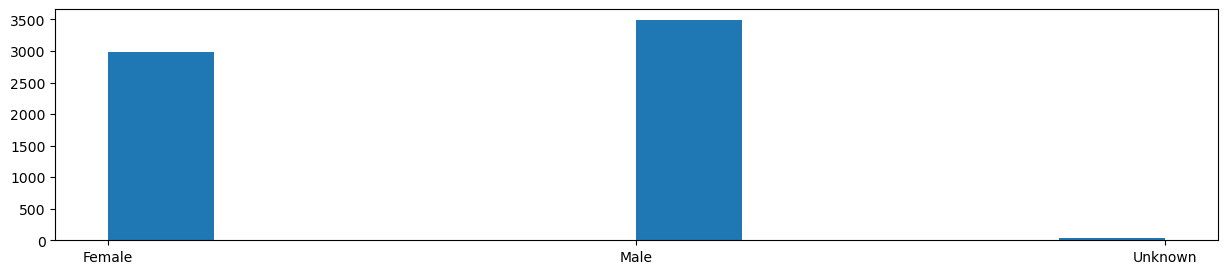

<Figure size 640x480 with 0 Axes>

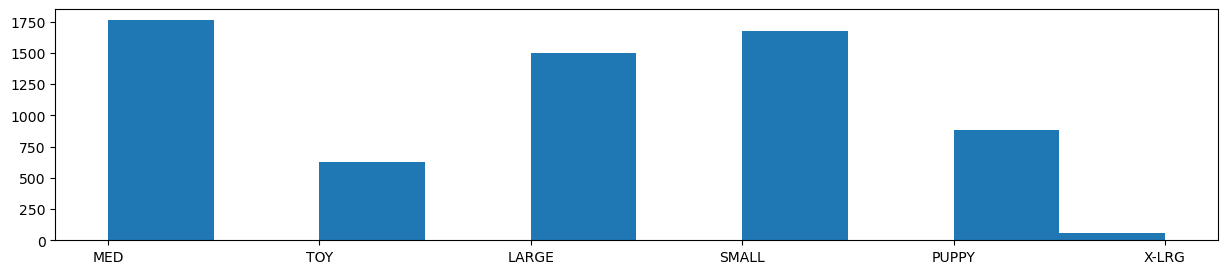

<Figure size 640x480 with 0 Axes>

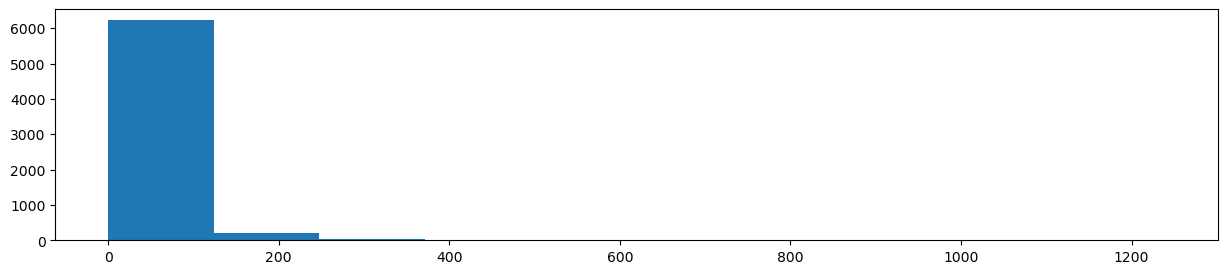

<Figure size 640x480 with 0 Axes>

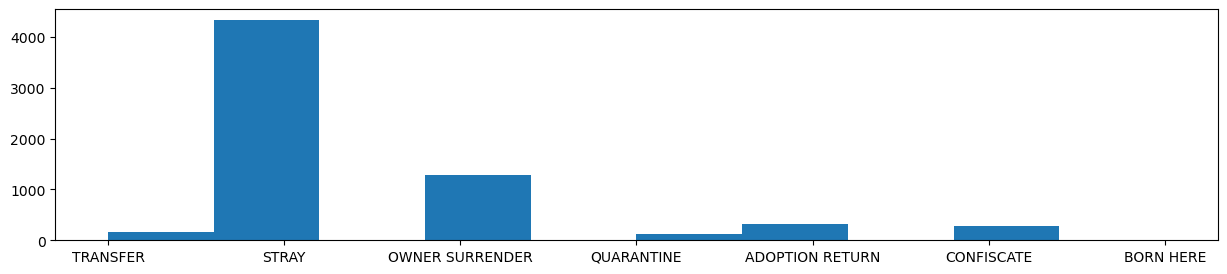

<Figure size 640x480 with 0 Axes>

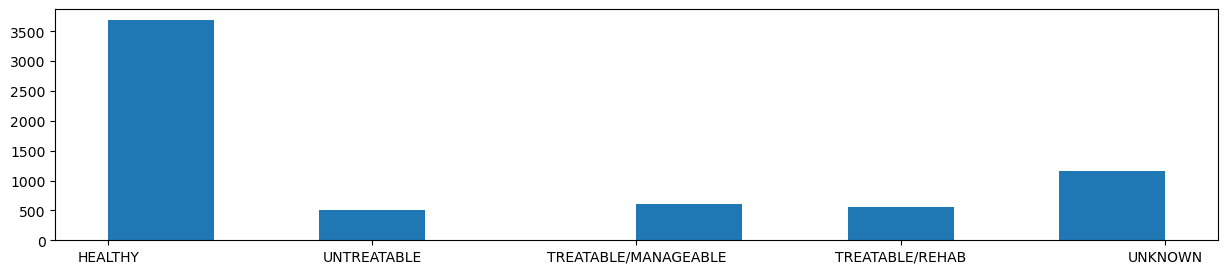

<Figure size 640x480 with 0 Axes>

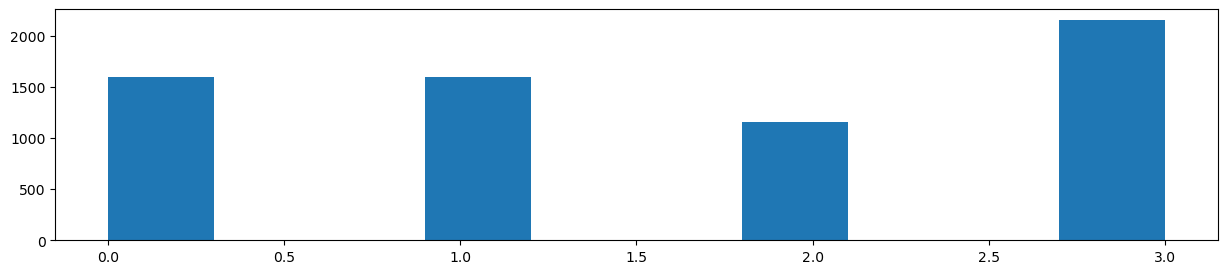

<Figure size 640x480 with 0 Axes>

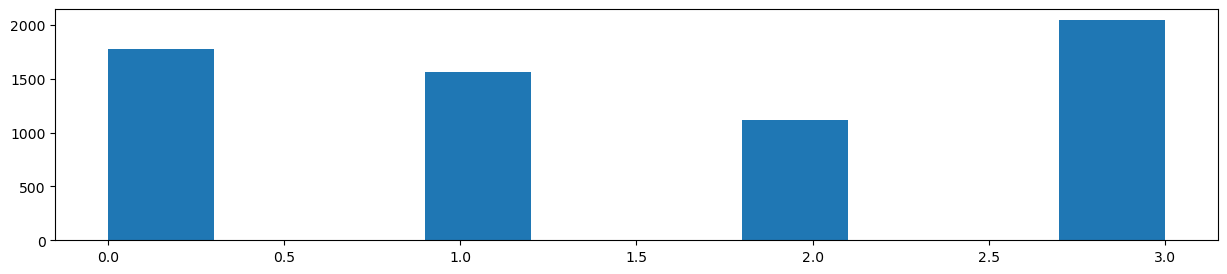

<Figure size 640x480 with 0 Axes>

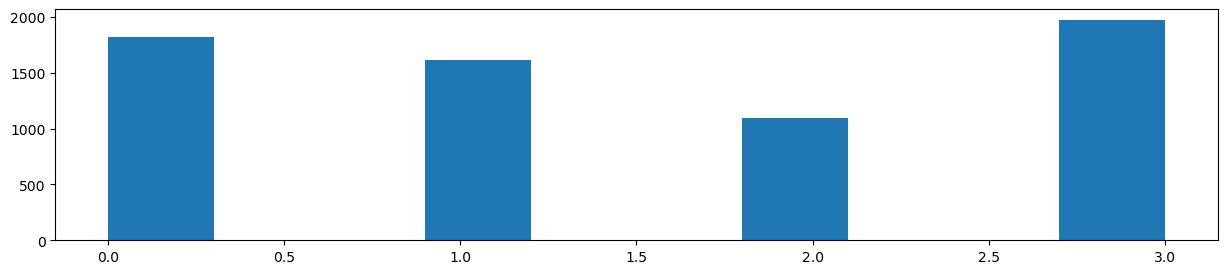

<Figure size 640x480 with 0 Axes>

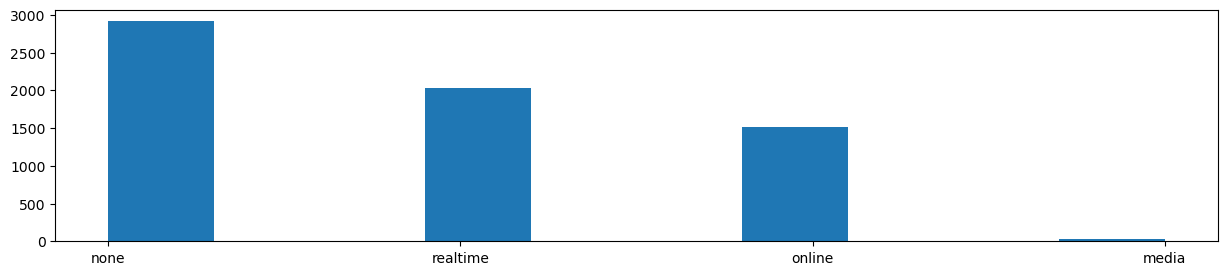

<Figure size 640x480 with 0 Axes>

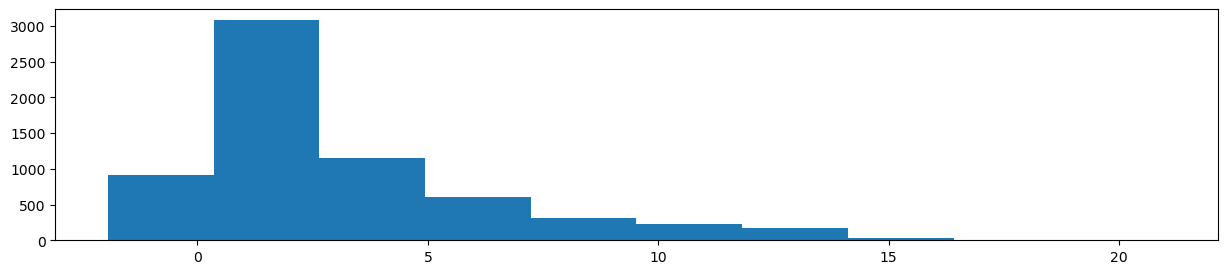

<Figure size 640x480 with 0 Axes>

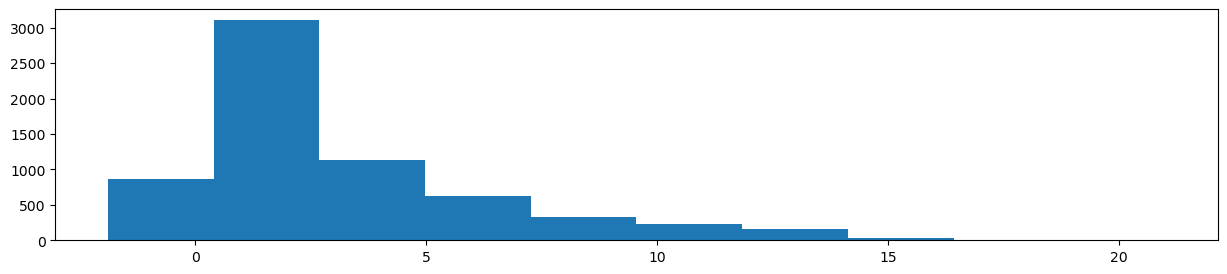

<Figure size 640x480 with 0 Axes>

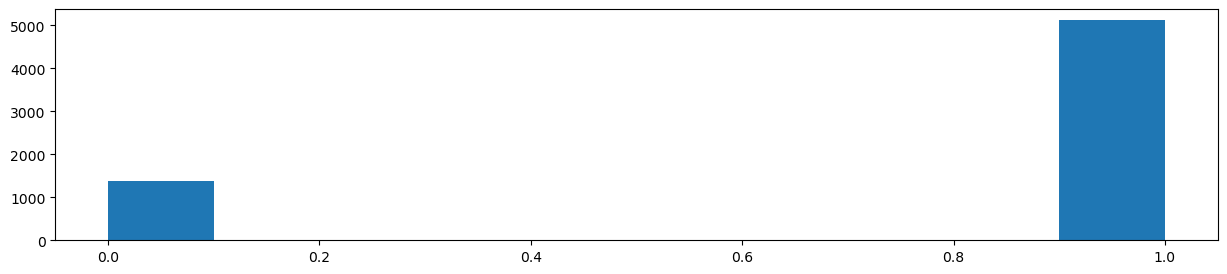

<Figure size 640x480 with 0 Axes>

In [203]:
for PAR in ['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']:
    fig = plt.figure(figsize=(15,3))
    plt.hist(dog_df[PAR])
    plt.show()
    plt.clf()


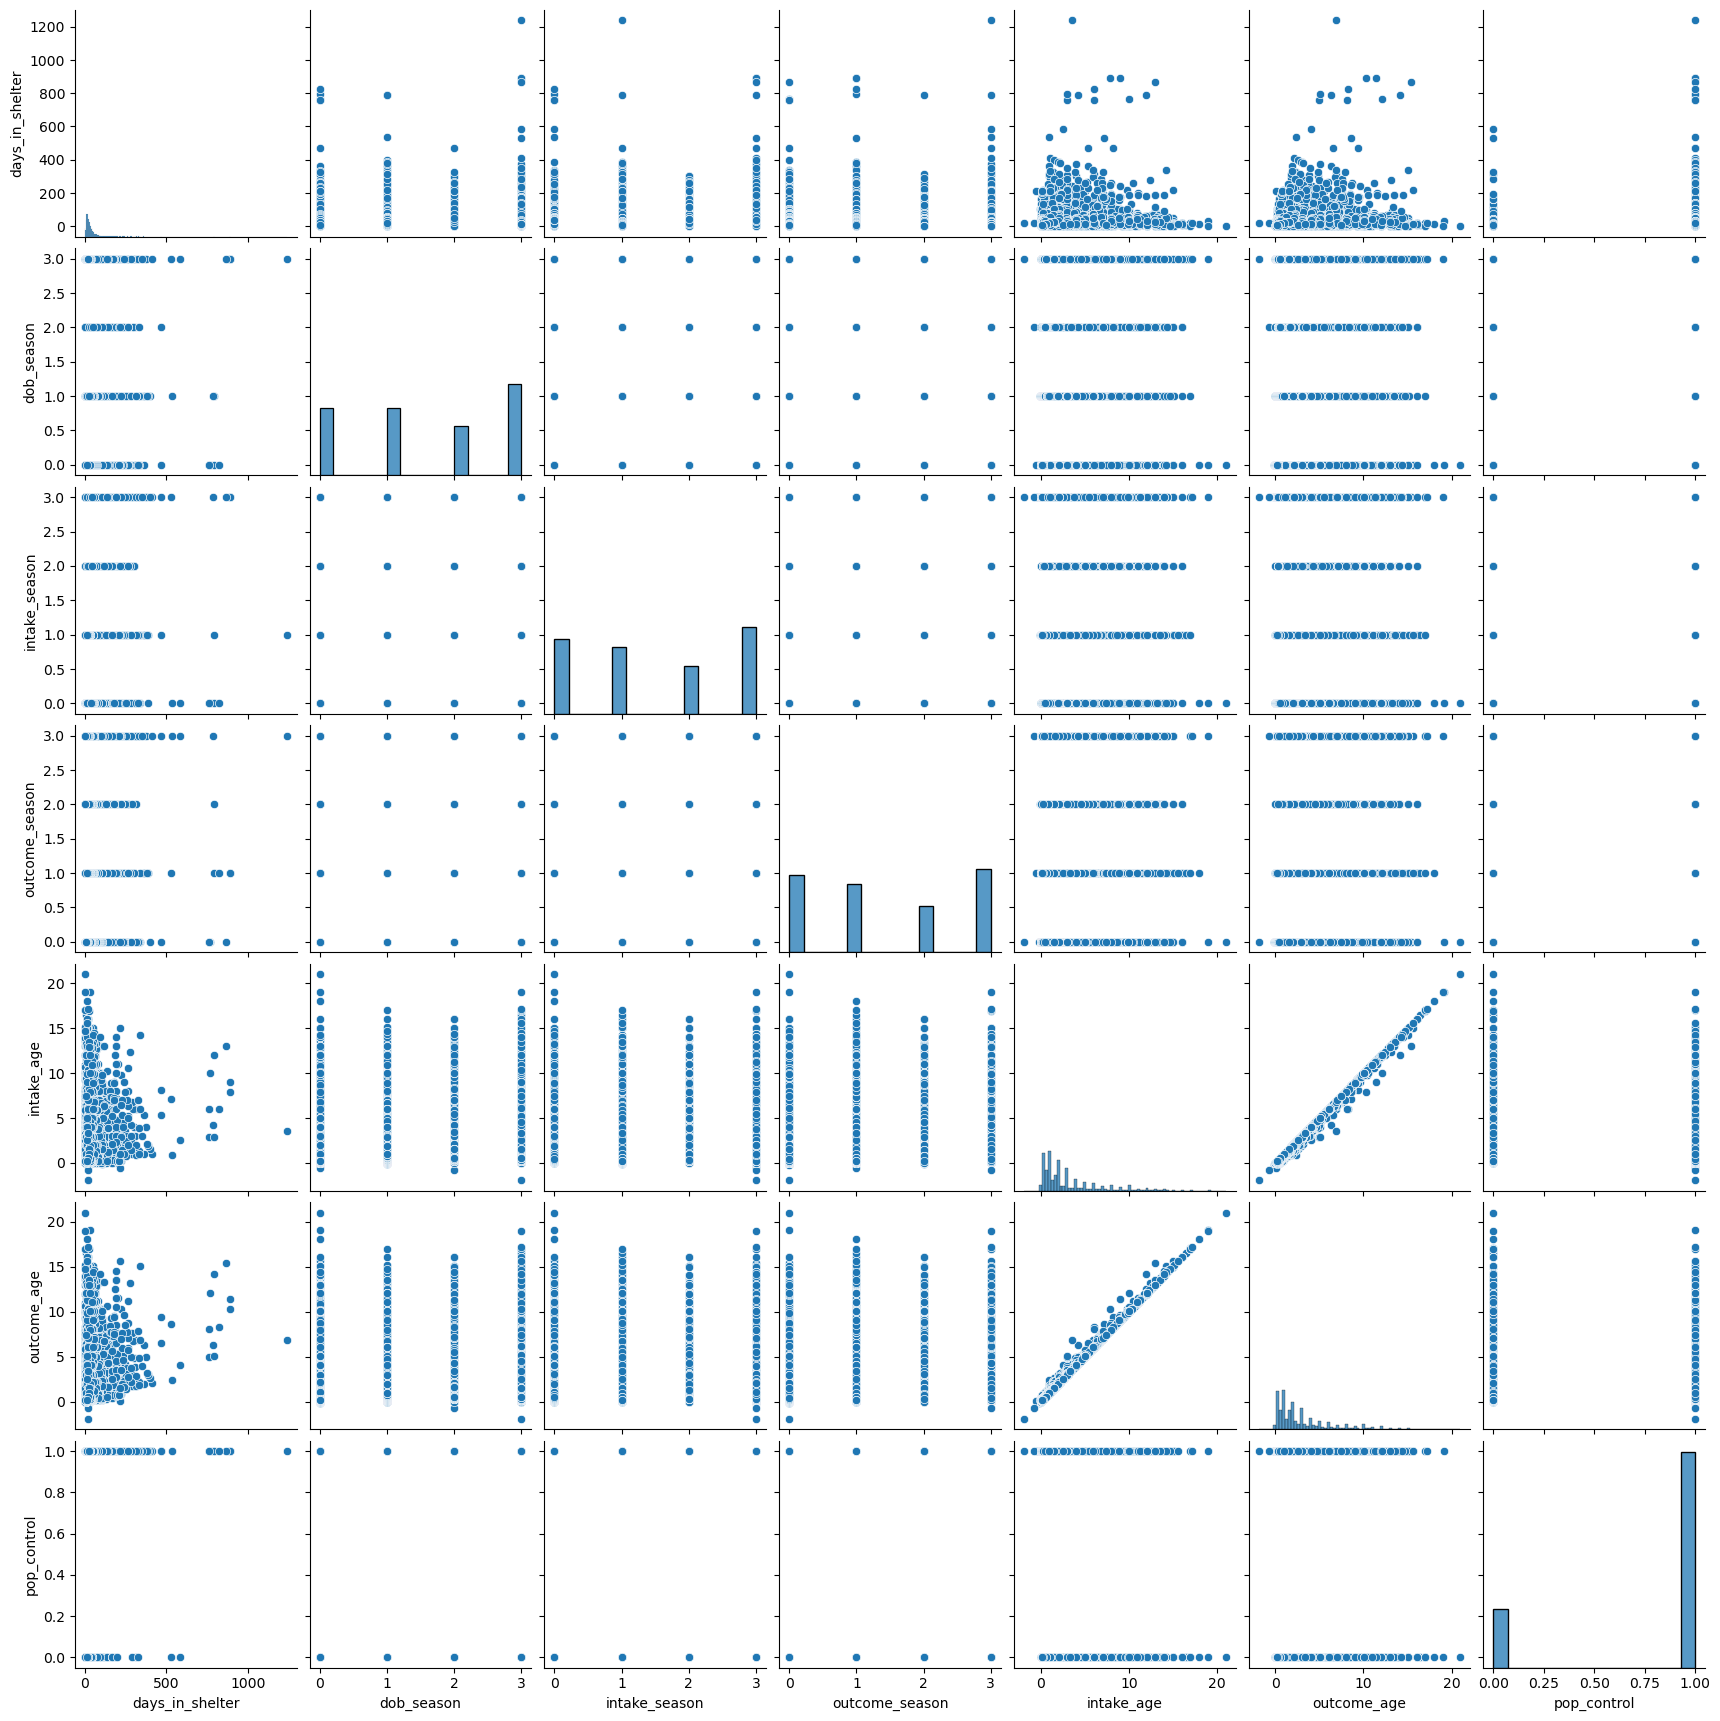

In [204]:
sns.pairplot(data=dog_df[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']])